In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from functools import reduce
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn import datasets


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

##### Upload Data
read CSV file

In [562]:
project1 = pd.read_excel("/Users/odedsabah/Desktop/metaphlan_file/df_project_1.xlsx")
project2 = pd.read_excel("/Users/odedsabah/Desktop/metaphlan_file/df_project_2.xlsx")
project3 = pd.read_excel("/Users/odedsabah/Desktop/metaphlan_file/df_project_3.xlsx")

In [563]:
project1 = project1.rename(columns={"name":"s__name","type" :"s__type"})
project2 = project2.rename(columns={"name":"s__name","type" :"s__type"})
project3 = project3.rename(columns={"name":"s__name","type" :"s__type"})

In [564]:
project1 = project1.loc[:,project1.columns.str.startswith('s')]
project2 = project2.loc[:,project2.columns.str.startswith('s')]
project3 = project3.loc[:,project3.columns.str.startswith('s')]

In [566]:
project1 = project1.T.reset_index()
project2 = project2.T.reset_index()
project3 = project3.T.reset_index()
project1.columns = project1.iloc[0]
project2.columns = project2.iloc[0]
project3.columns = project3.iloc[0]
project1 = project1.iloc[1:].rename_axis(None, axis=1)
project2 = project2.iloc[1:].rename_axis(None, axis=1)
project3 = project3.iloc[1:].rename_axis(None, axis=1)

In [567]:
dfs = [project1, project2, project3]

In [568]:
species_main = reduce(lambda  left,right: pd.merge(left,right,on=['s__name'],
                                            how='outer'), dfs)


In [570]:
species_main = species_main.fillna(0).T

In [571]:
species_main.columns = species_main.iloc[0]
species_main = species_main.iloc[1:].rename_axis(None, axis=1)

In [573]:
species_main = species_main.loc[:, (species_main == 0).mean() < 0.8]
species_main = pd.concat(species_main,)
species_main = species_main.reset_index()
species_main.to_csv("/Users/odedsabah/Desktop/metaphlan_p.csv")

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [69]:
species_main_ = pd.read_csv("/Users/odedsabah/Desktop/metaphlan_p.csv")
# species_main_['s__type'] = species_main_['s__type'].replace({0:'CD', 1:'Control'})

In [160]:
species_main_

,Unnamed: 0,s__Bacteroides_ovatus,s__Escherichia_coli,s__Escherichia_unclassified,s__Bacteroides_xylanisolvens,s__Ruminococcus_gnavus,s__Faecalibacterium_prausnitzii,s__Veillonella_unclassified,s__Bifidobacterium_longum,s__Clostridium_hathewayi,...,s__Lachnospiraceae_bacterium_2_1_58FAA,s__Roseburia_intestinalis,s__Ruminococcus_bromii,s__Coprococcus_catus,s__Barnesiella_intestinihominis,s__Alistipes_shahii,s__Bacteroides_massiliensis,s__Akkermansia_muciniphila,s__Ruminococcus_lactaris,s__type
0,SAMN03469288,45.51221,12.09859,11.68906,7.91162,3.15804,2.74788,1.13993,0.59935,0.55046,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
1,SAMN03469504,0.02861,0.02464,0.00000,0.80095,0.01479,28.20785,0.00593,0.05351,0.00279,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
2,SAMN03469276,0.00195,0.00000,0.01251,0.00000,0.07909,7.47017,0.00000,0.12190,0.03736,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
3,SAMN03469316,5.60650,0.83270,0.12691,0.74131,0.00000,9.10991,0.00370,18.69388,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
4,SAMN03469464,54.85986,0.48055,0.12514,0.64406,0.47938,0.00065,0.00921,1.41463,0.83822,...,0.00939,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,ESM5GEYU,0.00803,4.57888,0.07183,0.00000,0.01710,12.77383,2.28975,0.06505,0.53365,...,0.00312,0.23775,0.00117,0.00000,0.00000,0.00000,0.07727,0.00000,0.00000,1.0
260,CSM67U9X,0.69948,0.06476,0.05109,1.22794,0.00363,3.09731,0.04253,0.02383,0.00000,...,0.00000,0.01914,0.00000,0.00000,0.00512,0.61255,5.55624,0.01166,1.62146,0.0
261,HSM5MD6E,14.49594,0.00000,0.00000,0.00000,0.04105,15.48679,0.00000,0.00000,0.00000,...,0.00174,0.00000,0.19408,0.00000,0.00000,0.98328,12.71782,0.02290,0.04996,1.0
262,MSM9VZMQ,0.00000,0.00000,0.02042,0.89860,0.00000,4.14365,0.08869,0.00116,0.00000,...,0.00000,2.76490,0.48160,0.00000,7.73334,1.76415,12.96372,0.00000,0.12673,1.0


In [97]:
X = species_main_.iloc[:,1:90]
y = species_main_.iloc[:,-1]
mod1 = DecisionTreeClassifier()
mod1.fit(X,y)

DecisionTreeClassifier()

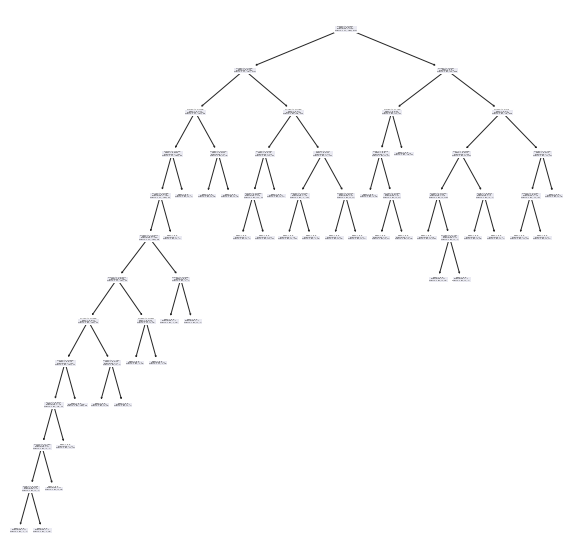

In [146]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(mod1)
plt.savefig('/Users/odedsabah/Desktop/test123.png', dpi=800) # high resolution graph

In [85]:
pred = mod1.predict(X)

In [86]:
pd.crosstab(pred, y)

s__type,-1.0,0.0,1.0
row_0,,,
-1.0,1,1,0
0.0,0,197,1
1.0,0,0,64


In [87]:
mod2 = RandomForestClassifier()

mod2.fit(X,y)

RandomForestClassifier()

In [93]:
pred2 = mod2.predict(X)

In [89]:
cm_RF = pd.crosstab(pred2, y)

<AxesSubplot:xlabel='s__type', ylabel='row_0'>

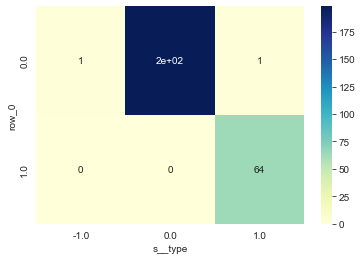

In [90]:
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [135]:
MTX_X = species_main_.iloc[:,1:90]
MTX_y = species_main_.iloc[:,-1]

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.50, random_state=42)

In [136]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train = model.transform(X_train)
X_test = model.transform(X_test)

In [152]:
n_estimators_RF = [50, 100, 250, 500, 1000]
max_features_RF = [ None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=2, random_state=0)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring="accuracy")

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
cm_RF_ = confusion_matrix(y_test, RF_predictions)
cm_RF_

Best Model:
RandomForestClassifier(max_features=None, n_estimators=250, random_state=0)


array([[ 0,  1,  0],
       [ 0, 95,  3],
       [ 0, 25,  8]])

<AxesSubplot:>

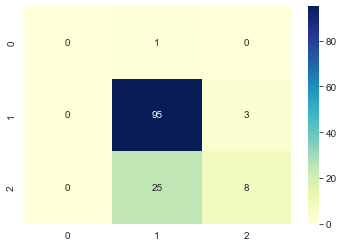

In [153]:
sns.heatmap(cm_RF_, cmap="YlGnBu", annot=True)

In [174]:
Genotype_between_phenotype = pd.read_csv("/Users/odedsabah/Desktop/Genotype_between_phenotype.csv")